<a href="https://colab.research.google.com/github/costpetrides/Air-pollution-COVID-19-impact/blob/main/Lockdown%201/Athinas(UT).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [222]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pyparsing.helpers import PrecededBy
url='https://raw.githubusercontent.com/costpetrides/Air-pollution-COVID-19-impact/main/Lockdown%201/DATA/AthinasLock.csv'
df = pd.read_csv(url)
print(df)

       DAY  CO20  C021  COMEAN  COMIN  COMAX  NO20  NO21  NOMEAN  NOMIN  ...  \
0    1-Mar   0.6   0.4     0.6    0.5    0.9    39    32      39     21  ...   
1    2-Mar   0.5   0.4     0.5    0.4    0.6    25    27      25     25  ...   
2    3-Mar   0.4   0.5     0.5    0.3    0.6    23    24      23     21  ...   
3    4-Mar   0.3   0.7     0.5    0.2    0.7    10    21      28     13  ...   
4    5-Mar   0.5   0.7     0.6    0.4    0.9    23    11      36     17  ...   
..     ...   ...   ...     ...    ...    ...   ...   ...     ...    ...  ...   
87  27-May   0.3   0.1     0.5    0.3    0.6     7    13      24     13  ...   
88  28-May   0.4   0.1     0.5    0.3    0.7    11    12      23     17  ...   
89  29-May   0.5   0.1     0.4    0.3    0.6    18    14      20     16  ...   
90  30-May   0.5   0.1     0.4    0.3    0.5    17    10      21     14  ...   
91  31-May   0.3   0.1     0.5    0.4    0.6    10    18      30     16  ...   

    O320  O321  O3MEAN  03MIN  03MAX  S

In [ ]:
def perc(a,b):
  x=abs(a-b)
  y=(a+b)/2
  return (x/y)*100


## **$SO_{2}$**

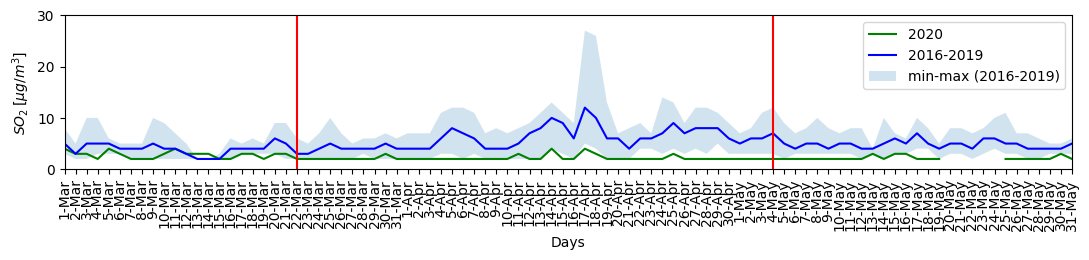

In [ ]:
plt.figure(figsize=(13,2))

plt.xlabel('Days')
plt.ylabel('$SO_{2} \: [μg/m^{3}$]')

x=[]
for i in df['SO220']:
  if i==0:
    x+=[None]
  else:
    x+=[i]

plt.plot(df['DAY'], x, 'g', label='2020')
plt.plot(df['DAY'], df['SO2MEAN'], 'b', label='2016-2019')
plt.fill_between(df['DAY'], df['SO2MIN'], df['SO2MAX'], alpha=0.2, label='min-max (2016-2019)')
plt.legend()


plt.xlim(df.loc[0]['DAY'] , df.loc[91]['DAY'])
plt.ylim(0,30)

plt.axvline(x='4-May' ,color='r')
plt.axvline(x='22-Mar' ,color='r')
plt.xticks(rotation=90)

plt.show()

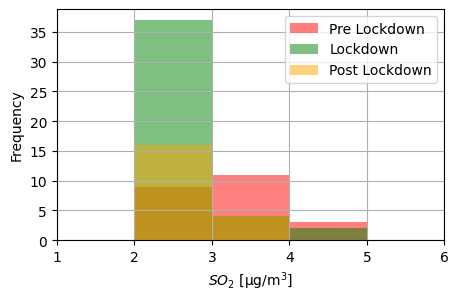

In [223]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Plotting a histogram
plt.figure(figsize=(5,3))

# Define bins from 0 to 1 with increments of 0.1
bins = np.linspace(0, 6, 7, endpoint=True)  # Ensure endpoint is True to include 1.0

# Plotting histograms
plt.hist(df['SO220'][0:23], bins=bins, alpha=0.5, label='Pre Lockdown', color= 'red')
plt.hist(df['SO220'][23:66], bins=bins, alpha=0.5, label='Lockdown',color= 'green')
plt.hist(df['SO220'][66:91], bins=bins, alpha=0.5, label='Post Lockdown',color='orange')

plt.xlabel('$SO_{2}$ [μg/m$^{3}$]')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.xlim(1,6)  # Ensure x-axis starts at 0 and ends at 1

plt.show()


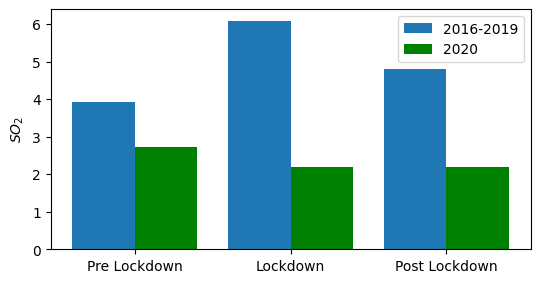

2020
Percentage Difference Pre-Lockdown to Lockdown = 22.46 % 
Difference Pre-Lockdown to Lockdown = 0.55  
Percentage Difference Lockdown to Post-Lockdown = 21.59 % 
Difference Lockdown to Post-Lockdown = 0.43  

2016-2019
Percentage Difference Pre-Lockdown to Lockdown = 43.57 % 
Difference Pre-Lockdown to Lockdown = -2.18 % 
Percentage Difference Lockdown to Post-Lockdown = 23.74 % 
Difference Lockdown to Post-Lockdown = 1.29 % 


In [ ]:
Data=np.array(df['SO220'])
Pre=Data[0:23]
Lock=Data[23:66]
Post=Data[66:91]

Postnew=[]
for c in Post:
  if c!=0:
    Postnew+=[c]

Data=np.array(df['SO2MEAN'])
Pre1=Data[0:23]
Lock1=Data[23:66]
Post1=Data[66:91]

Prev = (np.mean(Pre1),np.mean(Lock1),np.mean(Post1))        # Set of A data
LOCK=   (np.mean(Pre),np.mean(Lock),np.mean(Postnew))    # Set of B data

names= ['Pre Lockdown', 'Lockdown', 'Post Lockdown']     # Set of names for x asis

fig = plt.figure(figsize=(6,4), dpi=100)
left, bottom, width, height = 0.1, 0.2, 0.8, 0.6
ax = fig.add_axes([left, bottom, width, height])

width = 0.4
ticks = np.arange(len(names))
ax.bar(ticks, Prev, width, label='2016-2019')
ax.bar(ticks + width, LOCK, width, align="center", label='2020', color='green')

ax.set_ylabel('$SO_{2}$')
ax.set_xticks(ticks + width/2)
ax.set_xticklabels(names)

ax.legend(loc='best')
plt.show()

print('2020')
P1=perc(np.mean(Pre), np.mean(Lock))
P2=perc(np.mean(Lock),np.mean(Post))
print('Percentage Difference Pre-Lockdown to Lockdown = %.2f %% ' %(P1))
print('Difference Pre-Lockdown to Lockdown = %.2f  ' %(np.mean(Pre)- np.mean(Lock)))
print('Percentage Difference Lockdown to Post-Lockdown = %.2f %% ' %(P2))
print('Difference Lockdown to Post-Lockdown = %.2f  ' %(np.mean(Lock) -np.mean(Post)))

print()
print('2016-2019')
P11=perc(np.mean(Pre1), np.mean(Lock1))
P22=perc(np.mean(Lock1),np.mean(Post1))
print('Percentage Difference Pre-Lockdown to Lockdown = %.2f %% ' %(P11))
print('Difference Pre-Lockdown to Lockdown = %.2f %% ' %(np.mean(Pre1) - np.mean(Lock1)))
print('Percentage Difference Lockdown to Post-Lockdown = %.2f %% ' %(P22))
print('Difference Lockdown to Post-Lockdown = %.2f %% ' %(np.mean(Lock1) -np.mean(Post1)))


## **CO**

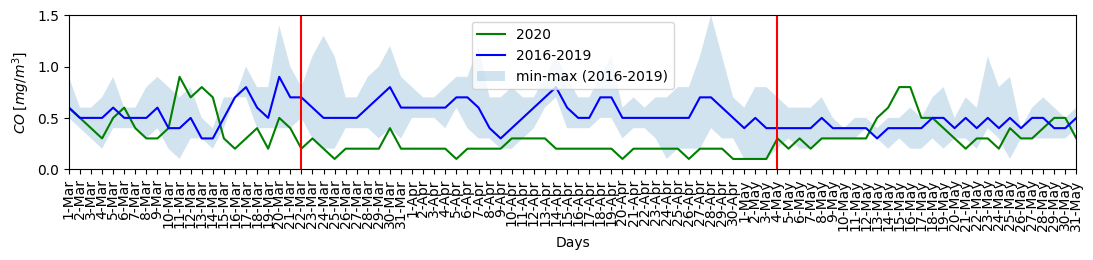

In [ ]:
plt.figure(figsize=(13,2))

plt.xlabel('Days')
plt.ylabel('$CO \: [mg/m^{3}$]')

plt.plot(df['DAY'], df['CO20'], 'g', label='2020')
plt.plot(df['DAY'], df['COMEAN'], 'b', label='2016-2019')
plt.fill_between(df['DAY'], df['COMIN'], df['COMAX'], alpha=0.2 ,label='min-max (2016-2019)')
plt.legend()

plt.xlim(df.loc[0]['DAY'] , df.loc[91]['DAY'])
plt.ylim(0,1.5)

plt.axvline(x='4-May' ,color='r')
plt.axvline(x='22-Mar' ,color='r')
plt.xticks(rotation=90)

plt.show()

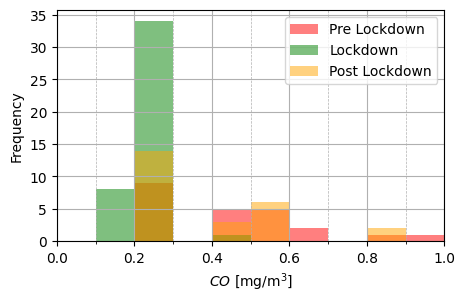

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your pandas DataFrame with 'CO20' column

# Plotting a histogram
plt.figure(figsize=(5,3))

# Define bins from 0 to 1 with increments of 0.1
bins = np.linspace(0, 1, 11, endpoint=True)  # Ensure endpoint is True to include 1.0

# Plotting histograms
plt.hist(df['CO20'][0:23], bins=bins, alpha=0.5, label='Pre Lockdown', color= 'red')
plt.hist(df['CO20'][23:66], bins=bins, alpha=0.5, label='Lockdown',color= 'green')
plt.hist(df['CO20'][66:91], bins=bins, alpha=0.5, label='Post Lockdown',color='orange')

plt.xlabel('$CO$ [mg/m$^{3}$]')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.xlim(0, 1)  # Ensure x-axis starts at 0 and ends at 1

plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(0.1))
plt.grid(which='minor', axis='x', linestyle='--', linewidth=0.5)
plt.show()

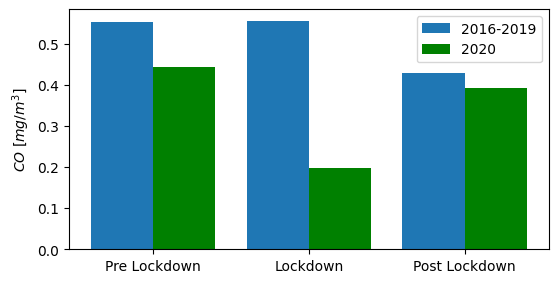

2020
Percentage Difference Pre-Lockdown to Lockdown = 76.68 % 
Difference Pre-Lockdown to Lockdown = 0.25  
Percentage Difference Lockdown to Post-Lockdown = 65.91 % 
Difference Lockdown to Post-Lockdown = -0.19  

2016-2019
Percentage Difference Pre-Lockdown to Lockdown = 0.66 % 
Difference Pre-Lockdown to Lockdown = -0.00 % 
Percentage Difference Lockdown to Post-Lockdown = 25.98 % 
Difference Lockdown to Post-Lockdown = 0.13 % 


In [ ]:
Data=np.array(df['CO20'])
Pre=Data[0:23]
Lock=Data[23:66]
Post=Data[66:91]

Data=np.array(df['COMEAN'])
Pre1=Data[0:23]
Lock1=Data[23:66]
Post1=Data[66:91]

Prev = (np.mean(Pre1),np.mean(Lock1),np.mean(Post1))        # Set of A data
LOCK=   (np.mean(Pre),np.mean(Lock),np.mean(Post))    # Set of B data

names= ['Pre Lockdown', 'Lockdown', 'Post Lockdown']     # Set of names for x asis

fig = plt.figure(figsize=(6,4), dpi=100)
left, bottom, width, height = 0.1, 0.2, 0.8, 0.6
ax = fig.add_axes([left, bottom, width, height])

width = 0.4
ticks = np.arange(len(names))
ax.bar(ticks, Prev, width, label='2016-2019')
ax.bar(ticks + width, LOCK, width, align="center", label='2020', color='green')

ax.set_ylabel('$CO}$ $[mg/m^{3}]$')
ax.set_xticks(ticks + width/2)
ax.set_xticklabels(names)

ax.legend(loc='best')
plt.show()

print('2020')
P1=perc(np.mean(Pre), np.mean(Lock))
P2=perc(np.mean(Lock),np.mean(Post))
print('Percentage Difference Pre-Lockdown to Lockdown = %.2f %% ' %(P1))
print('Difference Pre-Lockdown to Lockdown = %.2f  ' %(np.mean(Pre)- np.mean(Lock)))
print('Percentage Difference Lockdown to Post-Lockdown = %.2f %% ' %(P2))
print('Difference Lockdown to Post-Lockdown = %.2f  ' %(np.mean(Lock) -np.mean(Post)))

print()
print('2016-2019')
P11=perc(np.mean(Pre1), np.mean(Lock1))
P22=perc(np.mean(Lock1),np.mean(Post1))
print('Percentage Difference Pre-Lockdown to Lockdown = %.2f %% ' %(P11))
print('Difference Pre-Lockdown to Lockdown = %.2f %% ' %(np.mean(Pre1) - np.mean(Lock1)))
print('Percentage Difference Lockdown to Post-Lockdown = %.2f %% ' %(P22))
print('Difference Lockdown to Post-Lockdown = %.2f %% ' %(np.mean(Lock1) -np.mean(Post1)))

## **NO**

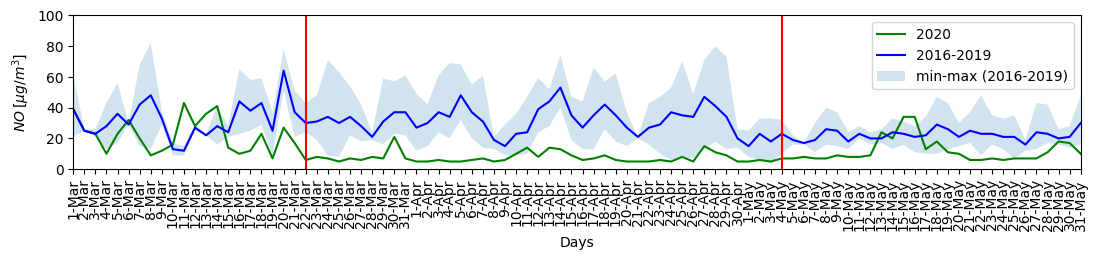

In [ ]:
plt.figure(figsize=(13,2))

plt.xlabel('Days')
plt.ylabel('$NO \: [μg/m^{3}$]')

plt.plot(df['DAY'], df['NO20'], 'g', label='2020')
plt.plot(df['DAY'], df['NOMEAN'], 'b', label='2016-2019')
plt.fill_between(df['DAY'], df['NOMIN'], df['NOMAX'], alpha=0.2 ,label='min-max (2016-2019)')

plt.legend()

plt.xlim(df.loc[0]['DAY'] , df.loc[91]['DAY'])
plt.ylim(0,100)

plt.axvline(x='4-May' ,color='r')
plt.axvline(x='22-Mar' ,color='r')
plt.xticks(rotation=90)

plt.show()

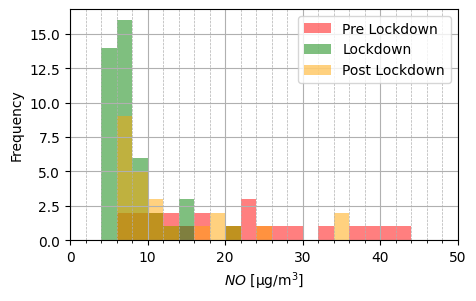

In [233]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Plotting a histogram
plt.figure(figsize=(5,3))

# Define bins from 0 to 1 with increments of 0.1
bins = np.linspace(0, 60, 31, endpoint=True)  # Ensure endpoint is True to include 1.0

# Plotting histograms
plt.hist(df['NO20'][0:23], bins=bins, alpha=0.5, label='Pre Lockdown', color= 'red')
plt.hist(df['NO20'][23:66], bins=bins, alpha=0.5, label='Lockdown',color= 'green')
plt.hist(df['NO20'][66:91], bins=bins, alpha=0.5, label='Post Lockdown',color='orange')

plt.xlabel('$NO$ [μg/m$^{3}$]')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.xlim(0,50)  # Ensure x-axis starts at 0 and ends at 1

plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(2))
plt.xticks(np.arange(0, 60, 10))
plt.grid(which='minor', axis='x', linestyle='--', linewidth=0.5)
plt.show()


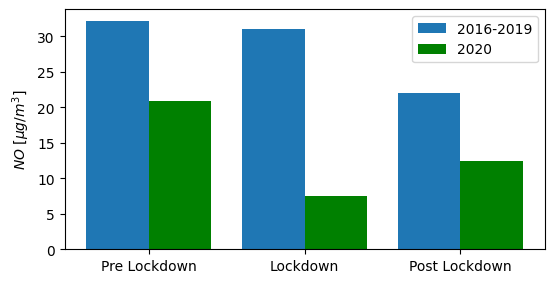

2020
Percentage Difference Pre-Lockdown to Lockdown = 94.29 % 
Difference Pre-Lockdown to Lockdown = 13.40  
Percentage Difference Lockdown to Post-Lockdown = 49.70 % 
Difference Lockdown to Post-Lockdown = -4.97  

2016-2019
Percentage Difference Pre-Lockdown to Lockdown = 3.55 % 
Difference Pre-Lockdown to Lockdown = 1.12 % 
Percentage Difference Lockdown to Post-Lockdown = 34.08 % 
Difference Lockdown to Post-Lockdown = 9.05 % 


In [ ]:
Data=np.array(df['NO20'])
Pre=Data[0:23]
Lock=Data[23:66]
Post=Data[66:91]

Data=np.array(df['NOMEAN'])
Pre1=Data[0:23]
Lock1=Data[23:66]
Post1=Data[66:91]

Prev = (np.mean(Pre1),np.mean(Lock1),np.mean(Post1))        # Set of A data
LOCK=   (np.mean(Pre),np.mean(Lock),np.mean(Post))    # Set of B data

names= ['Pre Lockdown', 'Lockdown', 'Post Lockdown']     # Set of names for x asis

fig = plt.figure(figsize=(6,4), dpi=100)
left, bottom, width, height = 0.1, 0.2, 0.8, 0.6
ax = fig.add_axes([left, bottom, width, height])

width = 0.4
ticks = np.arange(len(names))
ax.bar(ticks, Prev, width, label='2016-2019')
ax.bar(ticks + width, LOCK, width, align="center", label='2020', color='green')


ax.set_ylabel('$NO$ $[μg/m^{3}]$')
ax.set_xticks(ticks + width/2)
ax.set_xticklabels(names)

ax.legend(loc='best')
plt.show()

print('2020')
P1=perc(np.mean(Pre), np.mean(Lock))
P2=perc(np.mean(Lock),np.mean(Post))
print('Percentage Difference Pre-Lockdown to Lockdown = %.2f %% ' %(P1))
print('Difference Pre-Lockdown to Lockdown = %.2f  ' %(np.mean(Pre)- np.mean(Lock)))
print('Percentage Difference Lockdown to Post-Lockdown = %.2f %% ' %(P2))
print('Difference Lockdown to Post-Lockdown = %.2f  ' %(np.mean(Lock) -np.mean(Post)))

print()
print('2016-2019')
P11=perc(np.mean(Pre1), np.mean(Lock1))
P22=perc(np.mean(Lock1),np.mean(Post1))
print('Percentage Difference Pre-Lockdown to Lockdown = %.2f %% ' %(P11))
print('Difference Pre-Lockdown to Lockdown = %.2f %% ' %(np.mean(Pre1) - np.mean(Lock1)))
print('Percentage Difference Lockdown to Post-Lockdown = %.2f %% ' %(P22))
print('Difference Lockdown to Post-Lockdown = %.2f %% ' %(np.mean(Lock1) -np.mean(Post1)))

## **$NO_{2}$**

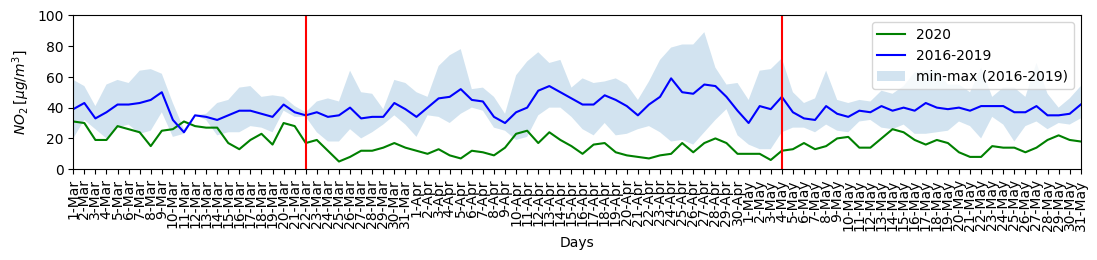

In [ ]:
plt.figure(figsize=(13,2))

plt.xlabel('Days')
plt.ylabel('$NO_{2} \: [μg/m^{3}$]')

plt.plot(df['DAY'], df['NO220'], 'g', label='2020')
plt.plot(df['DAY'], df['NO2MEAN'], 'b', label='2016-2019')
plt.fill_between(df['DAY'], df['NO2MIN'], df['NO2MAX'], alpha=0.2, label='min-max (2016-2019)')

plt.legend()

plt.xlim(df.loc[0]['DAY'] , df.loc[91]['DAY'])
plt.ylim(0,100)

plt.axvline(x='4-May' ,color='r')
plt.axvline(x='22-Mar' ,color='r')
plt.xticks(rotation=90)

plt.show()

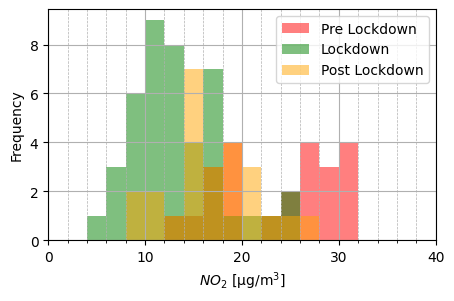

In [237]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Plotting a histogram
plt.figure(figsize=(5,3))

# Define bins from 0 to 1 with increments of 0.1
bins = np.linspace(0, 40, 21, endpoint=True)  # Ensure endpoint is True to include 1.0

# Plotting histograms
plt.hist(df['NO220'][0:23], bins=bins, alpha=0.5, label='Pre Lockdown', color= 'red')
plt.hist(df['NO220'][23:66], bins=bins, alpha=0.5, label='Lockdown',color= 'green')
plt.hist(df['NO220'][66:91], bins=bins, alpha=0.5, label='Post Lockdown',color='orange')

plt.xlabel('$NO_{2}$ [μg/m$^{3}$]')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.xlim(0,40)

plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(2))
plt.xticks(np.arange(0, 50, 10))
plt.grid(which='minor', axis='x', linestyle='--', linewidth=0.5)
plt.show()

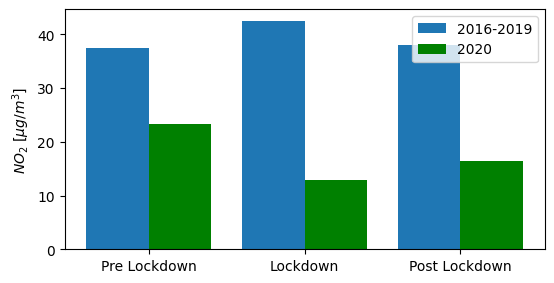

2020
Percentage Difference Pre-Lockdown to Lockdown = 57.93 % 
Difference Pre-Lockdown to Lockdown = 10.51  
Percentage Difference Lockdown to Post-Lockdown = 24.02 % 
Difference Lockdown to Post-Lockdown = -3.52  

2016-2019
Percentage Difference Pre-Lockdown to Lockdown = 12.58 % 
Difference Pre-Lockdown to Lockdown = -5.04 % 
Percentage Difference Lockdown to Post-Lockdown = 11.11 % 
Difference Lockdown to Post-Lockdown = 4.48 % 


In [ ]:
Data=np.array(df['NO220'])
Pre=Data[0:23]
Lock=Data[23:66]
Post=Data[66:91]

Data=np.array(df['NO2MEAN'])
Pre1=Data[0:23]
Lock1=Data[23:66]
Post1=Data[66:91]

Prev = (np.mean(Pre1),np.mean(Lock1),np.mean(Post1))        # Set of A data
LOCK=   (np.mean(Pre),np.mean(Lock),np.mean(Post))    # Set of B data

names= ['Pre Lockdown', 'Lockdown', 'Post Lockdown']     # Set of names for x asis

fig = plt.figure(figsize=(6,4), dpi=100)
left, bottom, width, height = 0.1, 0.2, 0.8, 0.6
ax = fig.add_axes([left, bottom, width, height])

width = 0.4
ticks = np.arange(len(names))
ax.bar(ticks, Prev, width, label='2016-2019')
ax.bar(ticks + width, LOCK, width, align="center", label='2020', color='green')

ax.set_ylabel('$NO_{2}$ $[μg/m^{3}]$')
ax.set_xticks(ticks + width/2)
ax.set_xticklabels(names)

ax.legend(loc='best')
plt.show()

print('2020')
P1=perc(np.mean(Pre), np.mean(Lock))
P2=perc(np.mean(Lock),np.mean(Post))
print('Percentage Difference Pre-Lockdown to Lockdown = %.2f %% ' %(P1))
print('Difference Pre-Lockdown to Lockdown = %.2f  ' %(np.mean(Pre)- np.mean(Lock)))
print('Percentage Difference Lockdown to Post-Lockdown = %.2f %% ' %(P2))
print('Difference Lockdown to Post-Lockdown = %.2f  ' %(np.mean(Lock) -np.mean(Post)))

print()
print('2016-2019')
P11=perc(np.mean(Pre1), np.mean(Lock1))
P22=perc(np.mean(Lock1),np.mean(Post1))
print('Percentage Difference Pre-Lockdown to Lockdown = %.2f %% ' %(P11))
print('Difference Pre-Lockdown to Lockdown = %.2f %% ' %(np.mean(Pre1) - np.mean(Lock1)))
print('Percentage Difference Lockdown to Post-Lockdown = %.2f %% ' %(P22))
print('Difference Lockdown to Post-Lockdown = %.2f %% ' %(np.mean(Lock1) -np.mean(Post1)))

## **$O_{3}$**

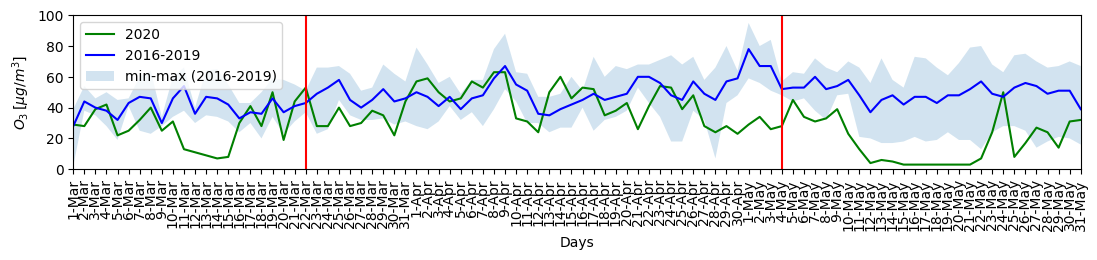

In [ ]:
plt.figure(figsize=(13,2))

plt.xlabel('Days')
plt.ylabel('$O_{3} \:  [μg/m^{3}$]')

x=[]
for i in df['O320']:
  if i==0:
    x+=[None]
  else:
    x+=[i]

plt.plot(df['DAY'], x, 'g', label='2020')
plt.plot(df['DAY'], df['O3MEAN'], 'b', label='2016-2019')
plt.fill_between(df['DAY'], df['03MIN'], df['03MAX'], alpha=0.2,label='min-max (2016-2019)')

plt.legend()

plt.xlim(df.loc[0]['DAY'] , df.loc[91]['DAY'])
plt.ylim(0,100)

plt.axvline(x='4-May' ,color='r')
plt.axvline(x='22-Mar' ,color='r')
plt.xticks(rotation=90)

plt.show()

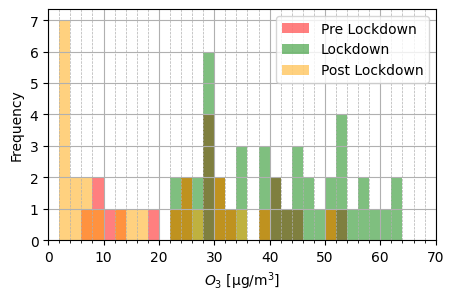

In [238]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Plotting a histogram
plt.figure(figsize=(5,3))

# Define bins from 0 to 1 with increments of 0.1
bins = np.linspace(0, 80, 41, endpoint=True)  # Ensure endpoint is True to include 1.0

# Plotting histograms
plt.hist(df['O320'][0:23], bins=bins, alpha=0.5, label='Pre Lockdown', color= 'red')
plt.hist(df['O320'][23:66], bins=bins, alpha=0.5, label='Lockdown',color= 'green')
plt.hist(df['O320'][66:91], bins=bins, alpha=0.5, label='Post Lockdown',color='orange')

plt.xlabel('$O_{3}$ [μg/m$^{3}$]')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.xlim(0,70)  # Ensure x-axis starts at 0 and ends at 1

plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(2))
plt.xticks(np.arange(0, 80, 10))
plt.grid(which='minor', axis='x', linestyle='--', linewidth=0.5)
plt.show()


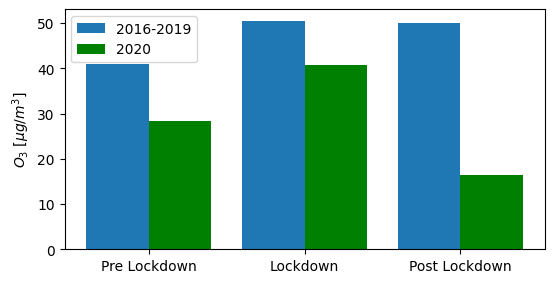

2020
Percentage Difference Pre-Lockdown to Lockdown = 35.37 % 
Difference Pre-Lockdown to Lockdown = -12.22  
Percentage Difference Lockdown to Post-Lockdown = 84.82 % 
Difference Lockdown to Post-Lockdown = 24.21  

2016-2019
Percentage Difference Pre-Lockdown to Lockdown = 21.04 % 
Difference Pre-Lockdown to Lockdown = -9.62 % 
Percentage Difference Lockdown to Post-Lockdown = 1.14 % 
Difference Lockdown to Post-Lockdown = 0.57 % 


In [ ]:
Data=np.array(df['O320'])
Pre=Data[0:23]
Lock=Data[23:66]
Post=Data[66:91]

Postnew=[]
for c in Post:
  if c!=0:
    Postnew+=[c]

Data=np.array(df['O3MEAN'])
Pre1=Data[0:23]
Lock1=Data[23:66]
Post1=Data[66:91]

Prev = (np.mean(Pre1),np.mean(Lock1),np.mean(Post1))        # Set of A data
LOCK=   (np.mean(Pre),np.mean(Lock),np.mean(Postnew))    # Set of B data

names= ['Pre Lockdown', 'Lockdown', 'Post Lockdown']     # Set of names for x asis

fig = plt.figure(figsize=(6,4), dpi=100)
left, bottom, width, height = 0.1, 0.2, 0.8, 0.6
ax = fig.add_axes([left, bottom, width, height])

width = 0.4
ticks = np.arange(len(names))
ax.bar(ticks, Prev, width, label='2016-2019')
ax.bar(ticks + width, LOCK, width, align="center", label='2020', color='green')

ax.set_ylabel('$O_{3}$ $[μg/m^{3}]$')
ax.set_xticks(ticks + width/2)
ax.set_xticklabels(names)

ax.legend(loc='best')
plt.show()

print('2020')
P1=perc(np.mean(Pre), np.mean(Lock))
P2=perc(np.mean(Lock),np.mean(Post))
print('Percentage Difference Pre-Lockdown to Lockdown = %.2f %% ' %(P1))
print('Difference Pre-Lockdown to Lockdown = %.2f  ' %(np.mean(Pre)- np.mean(Lock)))
print('Percentage Difference Lockdown to Post-Lockdown = %.2f %% ' %(P2))
print('Difference Lockdown to Post-Lockdown = %.2f  ' %(np.mean(Lock) -np.mean(Post)))

print()
print('2016-2019')
P11=perc(np.mean(Pre1), np.mean(Lock1))
P22=perc(np.mean(Lock1),np.mean(Post1))
print('Percentage Difference Pre-Lockdown to Lockdown = %.2f %% ' %(P11))
print('Difference Pre-Lockdown to Lockdown = %.2f %% ' %(np.mean(Pre1) - np.mean(Lock1)))
print('Percentage Difference Lockdown to Post-Lockdown = %.2f %% ' %(P22))
print('Difference Lockdown to Post-Lockdown = %.2f %% ' %(np.mean(Lock1) -np.mean(Post1)))